# outlier_detection_using_percentile

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset/placement.csv')
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [5]:
df.shape

(1000, 3)

In [6]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


C:\Users\CS-L2-PC15\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


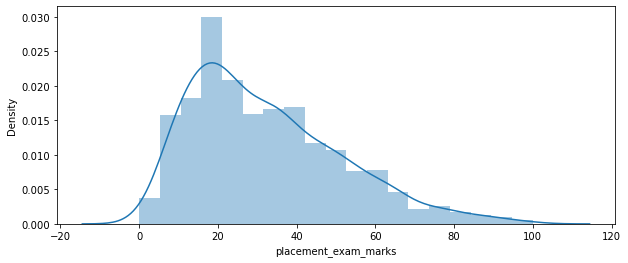

In [7]:
fig = plt.figure(figsize=(10,4))
sns.distplot(df["placement_exam_marks"])
plt.show()

C:\Users\CS-L2-PC15\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


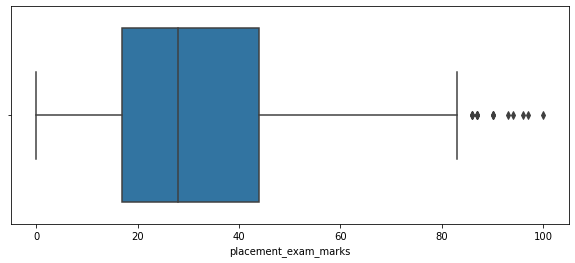

In [8]:
fig = plt.figure(figsize=(10,4))
sns.boxplot(df["placement_exam_marks"])
plt.show()

In [9]:
df["placement_exam_marks"].skew()

0.8356419499466834

**Finding the upper limite**

In [20]:
ul = df["placement_exam_marks"].quantile(0.9)
ul

60.0

**Finding the lower limite**

In [21]:
ll = df["placement_exam_marks"].quantile(0.1)
ll

10.0

**Triming**

In [22]:
df[(df["placement_exam_marks"]<ul) & (df["placement_exam_marks"]<ll)]

,cgpa,placement_exam_marks,placed
3,6.42,8.0,1
11,6.38,7.0,1
26,7.45,8.0,1
34,8.15,9.0,0
37,8.51,9.0,1
...,...,...,...
941,7.18,8.0,0
942,7.03,6.0,0
943,7.36,2.0,0
961,7.65,9.0,0


**capping**

In [14]:
df1 = df.copy()
df1

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [29]:
df1['placement_exam_marks'] = np.where(
    df1['placement_exam_marks']>ul,
    ul,
    np.where(
        df1['placement_exam_marks']<ll,
        ll,
        df1['placement_exam_marks']
    )
)

C:\Users\CS-L2-PC15\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

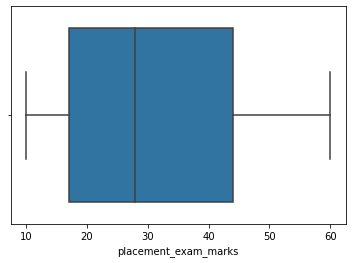

In [28]:
sns.boxplot(df1['placement_exam_marks'])

C:\Users\CS-L2-PC15\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\CS-L2-PC15\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


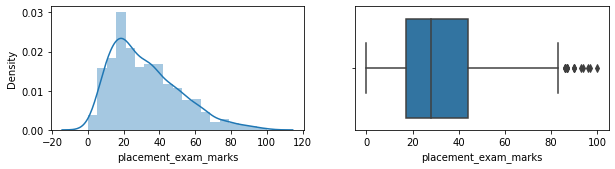

C:\Users\CS-L2-PC15\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\CS-L2-PC15\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


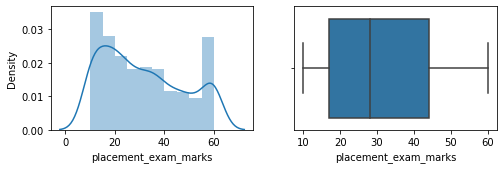

In [26]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.distplot(df["placement_exam_marks"])
plt.subplot(2,2,2)
sns.boxplot(df["placement_exam_marks"])
plt.show()

#new
plt.figure(figsize=(8,5))
plt.subplot(2,2,3)
sns.distplot(df1["placement_exam_marks"])
plt.subplot(2,2,4)
sns.boxplot(df1["placement_exam_marks"])
plt.show()